In [4]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/kdb.md")
data = loader.load()

In [11]:
datas = data[0].page_content

for i in datas.split("\n"):
    print(i)
    

# Jae Hyun Kim(김재현)

👩‍💻 AI Engineer 

💡 1994.12.13 (29살)

 🏠 서울시 성북구 보문동

### 🙇 저를 소개합니다

---

저는 어릴적부터 왜 이렇게 손이 가만히 있지 못하냐는 소리를 듣고 자랐습니다. 꿈을 꾸었던 직업은 보통 손이 멈추지 않는 직업들이었고, 무엇인가 만든다는 것에 대한 즐거움으로 성장했습니다. 그래서 AI 분야에 입문하면서 내가 만든 것이 온전히 내 소유가 아니라 공유하고 다른 사람의 생각과 연결하여 새로운 창작물을 만들어내는 것이 재밌어 보였습니다. 평소에 giver의 성격이기 때문에 항상 내 주변 사람들이 행복해지는 것이 내 진짜 행복이라고 생각합니다. 그래서 AI 분야로 입문하게 된다면 만든 기술을 오픈소스로 공개하고, 리눅스를 개발한 리누스 토르발스처럼 선한 영향력을 누구에게나 나누어주고 싶습니다. 어린 시절에는 수줍음이 많고 내성적인 성격이었지만, 커가면서 사회성이 발달하여 어디에서든 달갑게 받아들여지며 인사하는 습관을 중요하게 생각하여 지금도 먼저 인사하는 습관이 있습니다.

내가 한 선의의 습관들이 주변을 행복하게 만든다고 믿고, 지금도 그렇게 살고 있습니다. 지금은 네트워킹 형성을 좋아하며, 개발 직군으로 이직을 결심하게 된 계기도 많은 현직자들로부터 조언을 받으며 준비했습니다. 모두가 "어디서 그렇게 개발 직군 인맥이 있냐"고 물어볼 때, 저는 "사람을 좋아해서 만나고 얘기하고 함께 일하는 것이 너무 좋아서"라고 대답했습니다. 사실 이런 이유로 인해 관계 네트워크를 형성하였지만, 자연스럽게 나에게도 도움이 되고 있습니다. 이 분야로 입사하게 된다면, 다른 팀과 소통하고 상급자와 소통하는 것이 중요하다고 생각합니다. 그러므로 솔직하게 의견을 나누고 표현하여 좋은 능률성을 만들 수 있다고 생각합니다.

저는 항상 새로운 도전을 좋아하며, 개인적으로도 많은 취미생활을 즐기고 있습니다. 작곡, 공예, 조향  다양한 분야에서 새로운 것을 배우고 도전해보는 것을 좋아합니다. 이러한 취미생활

# 📘 개요

LLM을 기반으로 하는 애플리케이션은 데이터베이스나 PDF와 같은 파일에서 데이터를 추출하고, 이를 LLM이 활용할 수 있는 형식으로 변환하는 작업을 수반하는 경우가 많습니다. LangChain에서는 일반적으로 추출된 텍스트(`페이지_콘텐츠`)를 메타데이터(작성자 이름이나 발행일 등 문서에 대한 세부 정보가 포함된 사전)와 함께 캡슐화하는 문서 객체를 생성하는 작업이 포함됩니다.

문서 객체는 종종 LLM에 공급되는 프롬프트 형식으로 형식화되어, LLM이 문서의 정보를 사용하여 원하는 응답(예: 문서 요약)을 생성할 수 있도록 합니다. 문서는 즉시 사용하거나 나중에 검색 및 사용할 수 있도록 벡터스토어에 색인화할 수 있습니다.

## 🧩 문서 로딩의 주요 추상화

아래 표는 문서 로딩 과정에서 사용되는 주요 구성 요소들을 요약한 것입니다:

| 구성 요소        | 설명                                                                                               |
|----------------|----------------------------------------------------------------------------------------------------|
| `Document`       | 문서의 실제 내용을 포함합니다. 메타데이터도 포함할 수 있습니다.                                                  |
| `BaseLoader`     | 원시 데이터를 문서 객체로 변환하는 데 사용되는 인터페이스 또는 클래스입니다. 예를 들어, 블롭 파일이나 메모리에 있는 바이너리 데이터를 문서로 변환할 때 사용합니다. |
| `Blob`            | 파일이나 메모리에 저장된 바이너리 데이터의 표현입니다. 일반적으로 이미지, 오디오, 또는 다른 형태의 대용량 파일을 의미합니다.                  |
| `BaseBlobParser`       | 블롭이나 다른 형태의 원시 데이터에서 문서 객체를 생성하기 위해 필요한 코드 또는 알고리즘입니다. 이는 데이터를 읽고, 분석하고, 필요한 정보를 추출하는 과정을 포함합니다.  |  

## 📝 가이드

이 가이드에서는 사용자 정의 문서 로딩 및 파일 구문 분석 로직을 작성하는 방법을 구체적으로 살펴봅니다:

- `BaseLoader`에서 서브클래싱하여 표준 문서 로더를 생성합니다.
- `BaseBlobParser`를 사용하여 구문 분석기를 생성하고, 이를 `Blob` 및 `BlobLoaders`와 함께 사용합니다. 이는 주로 파일 작업 시 유용합니다.


# 📄 표준 문서 로더

문서 로더는 `BaseLoader`를 서브클래싱하여 구현할 수 있으며, 이는 문서를 로딩하기 위한 표준 인터페이스를 제공합니다. 이 인터페이스는 문서를 하나씩 느긋하게 또는 모두 한꺼번에 열심히 로딩하는 두 가지 방식을 지원하여, 제작 코드, 프로토타이핑 또는 인터랙티브 작업과 같은 다양한 사용 사례에 맞게 설계되었습니다.

## 🖥 인터페이스

인터페이스는 문서를 느긋하게 하나씩 로딩하거나, 열심히 모두 한 번에 로딩하는 방법을 위한 메소드로 구성됩니다. 각 메소드와 그 목적을 아래에 설명합니다:

| 메소드 이름     | 설명                                                                                       |
|--------------|-------------------------------------------------------------------------------------------|
| `lazy_load`  | 문서를 하나씩 느긋하게 로딩합니다. 메모리 사용을 최소화하기 위해 제작 코드에서 사용하기 적합합니다.                |
| `alazy_load` | `lazy_load`의 비동기 변형으로, 문서를 비동기적으로 로딩합니다.                                |
| `load`       | 모든 문서를 열심히 메모리로 로딩합니다. 주로 프로토타이핑 또는 인터랙티브 작업에 사용됩니다.                  |
| `aload`      | `load`의 비동기 변형으로, 2024-04에 LangChain에 추가되었습니다. 문서를 열심히 메모리로 비동기적으로 로딩합니다. |

- `load` 메소드는 프로토타이핑 작업을 위한 편의 메소드로, 단지 `list(self.lazy_load())`를 호출합니다.
- `alazy_load` 메소드는 기본적으로 `lazy_load`로 위임하는 기본 구현을 가지고 있습니다. 비동기를 사용하는 경우, 기본 구현을 오버라이딩하고 네이티브 비동기 구현을 제공하는 것이 권장됩니다.

> **정보**: 문서 로더를 구현할 때 `lazy_load` 또는 `alazy_load` 메소드를 통해 매개변수를 제공하지 마십시오. 모든 설정은 초기화자(`__init__`)를 통해 전달되어야 합니다. 이는 LangChain에서 한 번 문서 로더가 인스턴스화되면 모든 문서를 로딩하는 데 필요한 정보를 가지고 있어야 한다는 설계 선택이었습니다.


# 구현
파일을 로드하고 파일의 각 줄에서 문서를 생성하는 표준 문서 로더의 예를 만들어 보겠습니다.

In [12]:
from typing import AsyncIterator, Iterator

from langchain_core.document_loaders import BaseLoader
from langchain_core.documents import Document
# 이 클래스는 파일로부터 대량의 데이터를 효율적으로 처리해야 하는 애플리케이션에서 유용하게 사용될 수 있습니다. 예를 들어, 로그 파일이나 큰 텍스트 파일로부터 정보를 추출하고 분석할 때, 메모리 사용을 최소화하면서 필요한 데이터만을 느긋하게 또는 비동기적으로 로딩할 수 있습니다

class CustomDocumentLoader(BaseLoader):
    """An example document loader that reads a file line by line."""

    def __init__(self, file_path: str) -> None:
        """Initialize the loader with a file path.

        Args:
            file_path: The path to the file to load.
        """
        self.file_path = file_path                       

    def lazy_load(self) -> Iterator[Document]:  # <-- Does not take any arguments
        """A lazy loader that reads a file line by line.

        When you're implementing lazy load methods, you should use a generator
        to yield documents one by one.
        """
        with open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

    # alazy_load is OPTIONAL.
    # If you leave out the implementation, a default implementation which delegates to lazy_load will be used!
    async def alazy_load(
        self,
    ) -> AsyncIterator[Document]:  # <-- Does not take any arguments
        """An async lazy loader that reads a file line by line."""
        # Requires aiofiles
        # Install with `pip install aiofiles`
        # https://github.com/Tinche/aiofiles
        import aiofiles

        async with aiofiles.open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            async for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

# 테스트 🧪
문서 로더를 테스트하려면 고품질 콘텐츠가 포함된 파일이 필요합니다.
- 저는 Requirement.txt 파일을 한번 가져와봤습니다.

In [19]:
with open("/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt", "w", encoding="utf-8") as f: 
    quality_content = "sonny sonny \n kdb kdb🐱 \n holland😻😻"
    f.write(quality_content)

In [24]:
loader = CustomDocumentLoader("/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt")

In [25]:
for doc in loader.lazy_load():
    print()
    print(type(doc))
    print(doc)


<class 'langchain_core.documents.base.Document'>
page_content='sonny sonny \n' metadata={'line_number': 0, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}

<class 'langchain_core.documents.base.Document'>
page_content=' kdb kdb🐱 \n' metadata={'line_number': 1, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}

<class 'langchain_core.documents.base.Document'>
page_content=' holland😻😻' metadata={'line_number': 2, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}


In [26]:
## Test out the async implementation
async for doc in loader.alazy_load():
    print()
    print(type(doc))
    print(doc)


<class 'langchain_core.documents.base.Document'>
page_content='sonny sonny \n' metadata={'line_number': 0, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}

<class 'langchain_core.documents.base.Document'>
page_content=' kdb kdb🐱 \n' metadata={'line_number': 1, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}

<class 'langchain_core.documents.base.Document'>
page_content=' holland😻😻' metadata={'line_number': 2, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}


In [27]:
loader.load()

[Document(page_content='sonny sonny \n', metadata={'line_number': 0, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}),
 Document(page_content=' kdb kdb🐱 \n', metadata={'line_number': 1, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}),
 Document(page_content=' holland😻😻', metadata={'line_number': 2, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'})]

# Working with Files

많은 문서 로더는 파일 구문 분석을 포함합니다. 이러한 로더 간의 차이는 대개 파일을 로드하는 방식보다는 파일을 구문 분석하는 방식에서 비롯됩니다. 예를 들어, `open` 함수를 사용하여 PDF나 마크다운 파일의 바이너리 콘텐츠를 읽을 수 있지만, 해당 바이너리 데이터를 텍스트로 변환하려면 다른 파싱 로직이 필요합니다.

### 파일 구문 분석의 중요성

구문 분석 로직을 로딩 로직에서 분리함으로써, 데이터가 로드된 방식에 관계없이 주어진 구문 분석기를 더 쉽게 재사용할 수 있습니다. 이러한 접근 방식은 다양한 파일 형식과 데이터 소스를 효율적으로 처리할 수 있는 유연성을 제공합니다.

### `BaseBlobParser`

`BaseBlobParser`는 블롭을 받아 `Document` 객체 목록을 출력하는 인터페이스입니다. 블롭은 메모리나 파일에 있는 데이터의 표현입니다. LangChain 파이썬 라이브러리에는 블롭 WebAPI 사양에서 영감을 얻은 블롭 프리미티브가 포함되어 있습니다. 이를 통해 개발자는 다양한 데이터 소스에서 얻은 블롭 데이터를 효과적으로 처리하고 `Document` 객체로 변환할 수 있습니다.


In [28]:
from langchain_core.document_loaders import BaseBlobParser, Blob


class MyParser(BaseBlobParser):
    """A simple parser that creates a document from each line."""

    def lazy_parse(self, blob: Blob) -> Iterator[Document]:
        """Parse a blob into a document line by line."""
        line_number = 0
        with blob.as_bytes_io() as f:
            for line in f:
                line_number += 1
                yield Document( #document는 page_content와 metadata를 가지고 있는걸 반환해냄
                    page_content=line,
                    metadata={"line_number": line_number, "source": blob.source},
                )

In [29]:
blob = Blob.from_path("/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt")
parser = MyParser()

In [31]:
list(parser.lazy_parse(blob))

[Document(page_content='sonny sonny \n', metadata={'line_number': 1, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}),
 Document(page_content=' kdb kdb🐱 \n', metadata={'line_number': 2, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'}),
 Document(page_content=' holland😻😻', metadata={'line_number': 3, 'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'})]

In [32]:
blob = Blob(data=b"some data from memory\nmeow")
list(parser.lazy_parse(blob))

[Document(page_content='some data from memory\n', metadata={'line_number': 1, 'source': None}),
 Document(page_content='meow', metadata={'line_number': 2, 'source': None})]

In [42]:
blob = Blob.from_path("/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt", metadata={"soony": "son heung min"}) #datas.txt 파일로드하고,  meta 데이터쓰기

In [43]:
blob.encoding

'utf-8'

In [44]:
blob.as_bytes()

b'sonny sonny \n kdb kdb\xf0\x9f\x90\xb1 \n holland\xf0\x9f\x98\xbb\xf0\x9f\x98\xbb'

In [45]:
blob.as_string()

'sonny sonny \n kdb kdb🐱 \n holland😻😻'

In [46]:
blob.as_bytes_io()

In [47]:
blob.metadata # 메타데이터를 가져오기 때문에 이걸로 파싱가능할듯?

{'soony': 'son heung min'}

In [48]:
blob.source # langchain chat 처럼 source를 통해 리트리버된 문서정보를 제공 해줄 수 있을듯 하다.

'/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/datas.txt'

# Blob Loaders
파서가 바이너리 데이터를 문서로 구문 분석하는 데 필요한 로직을 캡슐화하는 반면, 블롭 로더는 주어진 저장 위치에서 블롭을 로드하는 데 필요한 로직을 캡슐화합니다.

현재 LangChain은 FileSystemBlobLoader만 지원합니다.

파일시스템블롭로더를 사용해 블롭을 로드한 다음 파서를 사용해 구문 분석할 수 있습니다.


In [ ]:
from langchain_community.document_loaders.blob_loaders import FileSystemBlobLoader

blob_loader = FileSystemBlobLoader(path=".", glob="*.mdx", show_progress=True) #path 를 설정하고 glob을 설정하면 해당 경로에 있는 파일들을 가져올 수 있음, show_progress는 진행상황을 보여줄지 안보여줄지 설정

In [ ]:
parser = MyParser()
for blob in blob_loader.yield_blobs():
    for doc in parser.lazy_parse(blob):
        print(doc)
        break

![스크린샷 2024-04-08 오전 11.25.49.png](<attachment:스크린샷 2024-04-08 오전 11.25.49.png>)
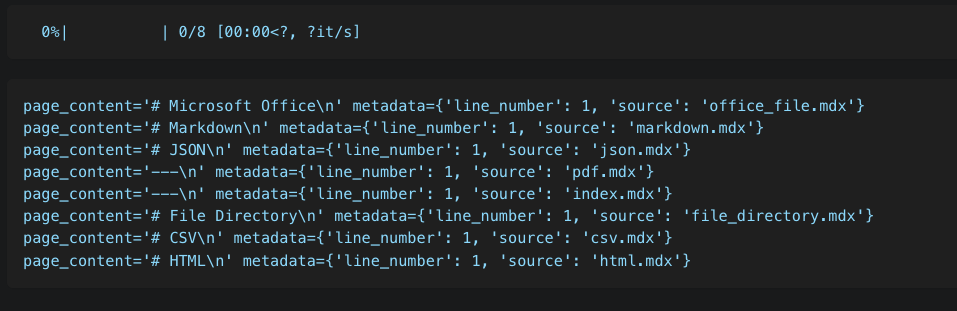

# Generic Loader
LangChain에는 BaseBlobParser로 BlobLoader를 구성하는 GenericLoader 추상화가 있습니다.

GenericLoader는 표준화된 클래스 메서드를 제공하여 기존 BlobLoader 구현을 쉽게 사용할 수 있도록 하기 위한 것입니다. 현재로서는 FileSystemBlobLoader만 지원됩니다.

In [ ]:
from langchain_community.document_loaders.generic import GenericLoader

loader = GenericLoader.from_filesystem(
    path=".", glob="*.mdx", show_progress=True, parser=MyParser() #GenericLoader는 파일시스템에서 파일을 로드하고, glob을 통해 파일을 필터링하고, parser에서 Blob loader 를 통해 파싱을 수행한다.
)

for idx, doc in enumerate(loader.lazy_load()):
    if idx < 5:
        print(doc)

print("... output truncated for demo purposes")

# Custom Generic Loader
클래스를 만드는 것을 정말 좋아한다면 하위 클래스를 만들어 로직을 함께 캡슐화할 수 있습니다.

이 클래스에서 서브클래스를 생성하여 기존 로더를 사용하여 콘텐츠를 로드할 수 있습니다.

In [49]:
from typing import Any

class MyCustomLoader(GenericLoader):
    @staticmethod
    def get_parser(**kwargs: Any) -> BaseBlobParser: #파서를 설정하는 메소드로, 이 메소드를 오버라이드해서 파서를 설정할 수 있어서 커스텀 가능함
        """Override this method to associate a default parser with the class."""
        return MyParser()

NameError: name 'GenericLoader' is not defined

In [ ]:
loader = MyCustomLoader.from_filesystem(path=".", glob="*.mdx", show_progress=True)

for idx, doc in enumerate(loader.lazy_load()):
    if idx < 5:
        print(doc)

print("... output truncated for demo purposes")

# CSV
쉼표로 구분된 값(CSV) 파일은 쉼표를 사용하여 값을 구분하는 구분된 텍스트 파일입니다. 파일의 각 줄은 데이터 레코드입니다. 각 레코드는 쉼표로 구분된 하나 이상의 필드로 구성됩니다.




In [50]:
from langchain_community.document_loaders.csv_loader import CSVLoader


loader = CSVLoader(file_path='/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv')
data = loader.load()

In [51]:
data

[Document(page_content='publish_date: 20200101\nheadline_text: a new type of resolution for the new year', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 0}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaide records driest year in more than a decade', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 1}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaide riverbank catches alight after new years eve fireworks', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 2}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaides 9pm fireworks spark blaze on riverbank', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 3}),
 Document(page_content='publish_date: 20200101\nheadline_text: archaic legislation governing nt women property rights', metadata={'source': '/Users/kdb/De

In [52]:
import pandas as pd
dataframe = pd.read_csv('/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv')

In [53]:
dataframe

,publish_date,headline_text
0,20200101,a new type of resolution for the new year
1,20200101,adelaide records driest year in more than a de...
2,20200101,adelaide riverbank catches alight after new ye...
3,20200101,adelaides 9pm fireworks spark blaze on riverbank
4,20200101,archaic legislation governing nt women propert...
...,...,...
2442,20200131,who coronavirus global emergency
2443,20200131,who declares coronavirus outbreak as global he...
2444,20200131,will travel insurance cover trip cancelled ove...
2445,20200131,world youngest leader 33 years old offers hope...


# Customizing the CSV parsing and loading
지원되는 CSV 인수에 대한 자세한 내용은 CSV 모듈 설명서를 참조하세요.

- delimiter: 이 매개변수는 필드(데이터 열)를 서로 구분하는 데 사용되는 문자를 지정합니다. 가장 일반적인 구분자는 쉼표(,)입니다. 이는 "Comma Separated Values" (CSV)의 이름에서도 알 수 있듯이, 각 데이터 필드가 쉼표로 구분되어 있는 파일 형식을 가리킵니다. 하지만 다른 문자도 구분자로 사용될 수 있으며, 예를 들어 탭(\t)이 사용되는 경우가 있는데, 이런 파일 형식을 TSV(탭으로 구분된 값)라고 합니다.

- quotechar: 이 매개변수는 필드 내에 구분자나 특별한 문자가 포함되어 있을 경우, 해당 필드를 감싸는 데 사용되는 문자를 지정합니다. 가장 일반적으로 사용되는 인용 문자는 큰따옴표(")입니다. 예를 들어, 데이터 필드에 쉼표가 포함되어 있는 경우, 해당 필드는 큰따옴표로 감싸져 CSV 파서가 필드 내의 쉼표를 데이터 필드 구분자로 잘못 해석하는 것을 방지합니다.

In [58]:
loader = CSVLoader(file_path='/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', csv_args={
    'delimiter': ',',
    'quotechar': '"',
    'fieldnames': ['MLB Team', 'Payroll in millions', 'Wins']
})

In [59]:
data = loader.load()

In [60]:
data

[Document(page_content='MLB Team: publish_date\nPayroll in millions: headline_text\nWins: None', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 0}),
 Document(page_content='MLB Team: 20200101\nPayroll in millions: a new type of resolution for the new year\nWins: None', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 1}),
 Document(page_content='MLB Team: 20200101\nPayroll in millions: adelaide records driest year in more than a decade\nWins: None', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 2}),
 Document(page_content='MLB Team: 20200101\nPayroll in millions: adelaide riverbank catches alight after new years eve fireworks\nWins: None', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', 'row': 3}),
 Document(page_content='MLB Team: 20200101\nPayroll in millions: adelaides 9pm fireworks spark blaze on riverbank\nWins: None', m

# Specify a column to identify the document source
- source_column 인수를 사용하여 각 행에서 생성된 문서의 소스를 지정합니다. 그렇지 않으면 file_path가 CSV 파일에서 생성된 모든 문서의 소스로 사용됩니다.
- 이 옵션은 소스를 사용하여 질문에 답변하는 체인에 CSV 파일에서 로드한 문서를 사용할 때 유용합니다.


In [ ]:
loader = CSVLoader(file_path='/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/abc.csv', source_column="publish_date") #source_column 에 publish_date를 설정하면, 해당 컬럼을 source로 설정할 수 있음
data = loader.load()

In [64]:
data 

[Document(page_content='publish_date: 20200101\nheadline_text: a new type of resolution for the new year', metadata={'source': '20200101', 'row': 0}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaide records driest year in more than a decade', metadata={'source': '20200101', 'row': 1}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaide riverbank catches alight after new years eve fireworks', metadata={'source': '20200101', 'row': 2}),
 Document(page_content='publish_date: 20200101\nheadline_text: adelaides 9pm fireworks spark blaze on riverbank', metadata={'source': '20200101', 'row': 3}),
 Document(page_content='publish_date: 20200101\nheadline_text: archaic legislation governing nt women property rights', metadata={'source': '20200101', 'row': 4}),
 Document(page_content='publish_date: 20200101\nheadline_text: australia welcomed 2020 with fireworks display in capital cities', metadata={'source': '20200101', 'row': 5}),
 Document(page_conte

# File Directory
여기서는 디렉토리에 있는 모든 문서를 로드하는 방법을 다룹니다. 내부적으로는 기본적으로 UnstructuredLoader를 사용합니다.

In [65]:
from langchain_community.document_loaders import DirectoryLoader
'''
We can use the glob parameter to control which files to load. Note that here it doesn't load the .rst file or the .html files.
'''
loader = DirectoryLoader('../4weeks_retrieval/data', glob="*.txt", show_progress=True)

docs = loader.load()

len(docs)

1

### Show a progress bar
- 기본적으로 진행률 표시줄은 표시되지 않습니다. 진행률 표시줄을 표시하려면 tqdm 라이브러리를 설치(예: pip install tqdm)하고 show_progress 매개 변수를 True로 설정합니다.

In [67]:
loader = DirectoryLoader('../4weeks_retrieval/data', glob="*.txt", show_progress=True)

docs = loader.load()

100%|██████████| 1/1 [00:00<00:00, 84.86it/s]


### Use multithreading
- 멀티스레딩 사용 기본적으로 로드는 하나의 스레드에서 이루어집니다. 여러 스레드를 활용하려면 use_multithreading 플래그를 true로 설정하세요.

In [68]:
loader = DirectoryLoader('../4weeks_retrieval/data', glob="*.txt", use_multithreading=True)

docs = loader.load()


# Change loader class
기본적으로 UnstructuredLoader 클래스를 사용합니다. 하지만 로더의 유형을 쉽게 변경할 수 있습니다.

In [70]:
from langchain_community.document_loaders import TextLoader

loader = DirectoryLoader('../4weeks_retrieval/data', glob="*.txt", loader_cls=TextLoader)

docs = loader.load()

len(docs)

1

- 파이썬코드 로드

In [ ]:
from langchain_community.document_loaders import PythonLoader

loader = DirectoryLoader('../../../../../', glob="**/*.py", loader_cls=PythonLoader)

docs = loader.load()

len(docs)

# Auto-detect file encodings with TextLoader

- 이 예제에서는 TextLoader 클래스를 사용하여 디렉토리에서 대량의 임의 파일 목록을 로드할 때 유용한 몇 가지 전략을 살펴볼 것입니다.

- 먼저 문제를 설명하기 위해 임의의 인코딩으로 여러 개의 텍스트를 로드해 보겠습니다.

In [71]:
path = '../4weeks_retrieval/data'
loader = DirectoryLoader(path, glob="**/*.txt", loader_cls=TextLoader)

In [72]:
loader.load()

[Document(page_content='sonny sonny \n kdb kdb🐱 \n holland😻😻', metadata={'source': '../4weeks_retrieval/data/datas.txt'})]

### B. 자동 실패
디렉터리로더에 silent_errors 매개변수를 전달하여 로드할 수 없는 파일을 건너뛰고 로드 프로세스를 계속 진행할 수 있습니다.

In [ ]:
loader = DirectoryLoader(path, glob="**/*.txt", loader_cls=TextLoader, silent_errors=True) #에러가 발생하면 무시하고 진행할 수 있음 slilent_errors=True
docs = loader.load()


doc_sources = [doc.metadata['source']  for doc in docs]
doc_sources

### C. Auto detect encodings
또한 로더 클래스에 자동 감지_인코딩을 전달하여 실패하기 전에 파일 인코딩을 자동으로 감지하도록 TextLoader에 요청할 수도 있습니다.

In [73]:
text_loader_kwargs={'autodetect_encoding': True}
loader = DirectoryLoader(path, glob="**/*.txt", loader_cls=TextLoader, loader_kwargs=text_loader_kwargs)
docs = loader.load()


doc_sources = [doc.metadata['source']  for doc in docs]
doc_sources

['../4weeks_retrieval/data/datas.txt']

# HTML

In [ ]:
from langchain_community.document_loaders import UnstructuredHTMLLoader
loader = UnstructuredHTMLLoader("example_data/fake-content.html")
data = loader.load() #html 파일을 로드하고, 데이터를 가져옴

### Loading HTML with BeautifulSoup4

In [ ]:
from langchain_community.document_loaders import BSHTMLLoader

loader = BSHTMLLoader("example_data/fake-content.html")
data = loader.load()
data

### Loading HTML with 
- Azure AI 문서 인텔리전스(이전의 Azure 양식 인식기)는 디지털 또는 스캔한 PDF, 이미지, Office 및 HTML 파일에서 텍스트(필기 포함), 표, 문서 구조(예: 제목, 섹션 제목 등) 및 키-값 쌍을 추출하는 기계 학습 기반 서비스입니다. 문서 인텔리전스는 PDF, JPEG/JPG, PNG, BMP, TIFF, HEIF, DOCX, XLSX, PPTX 및 HTML을 지원합니다.

- 현재 문서 인텔리전스를 사용하는 로더의 구현은 콘텐츠를 페이지 단위로 통합하여 LangChain 문서로 변환할 수 있습니다. 기본 출력 형식은 마크다운이며, 마크다운헤더텍스트스플라터로 쉽게 연결하여 시맨틱 문서 청킹을 할 수 있습니다. 모드="single" 또는 모드="page"를 사용하여 단일 페이지 또는 페이지별로 분할된 문서로 순수한 텍스트를 반환할 수도 있습니다.

**전제 조건**
- 3개 미리 보기 지역 중 하나에 있는 Azure AI Document Intelligence 리소스: 미국 동부, 미국 서부2, 서유럽 - 없는 경우 이 문서를 따라 리소스를 만드세요. 로더에 매개 변수로 <엔드포인트> 및 <키>를 전달합니다.

In [ ]:
from langchain_community.document_loaders import AzureAIDocumentIntelligenceLoader

file_path = "<filepath>"
endpoint = "<endpoint>"
key = "<key>"
loader = AzureAIDocumentIntelligenceLoader(
    api_endpoint=endpoint, api_key=key, file_path=file_path, api_model="prebuilt-layout"
) #AzureAIDocumentIntelligenceLoader를 사용하면, Azure AI를 통해 문서를 로드하고, 데이터를 가져올 수 있음

documents = loader.load()

# JSON
- JSON(JavaScript Object Notation)은 사람이 읽을 수 있는 텍스트를 사용하여 속성-값 쌍과 배열(또는 기타 직렬화 가능한 값)로 구성된 데이터 객체를 저장 및 전송하는 개방형 표준 파일 형식이자 데이터 교환 형식입니다.

- JSON 줄은 각 줄이 유효한 JSON 값인 파일 형식입니다.

- JSONLoader는 지정된 jq 스키마를 사용하여 JSON 파일을 파싱합니다. jq 파이썬 패키지를 사용합니다. jq 구문에 대한 자세한 설명은 이 설명서를 참조하세요.

In [ ]:
import json
from pathlib import Path
from pprint import pprint


file_path='./example_data/facebook_chat.json' #json 예제 파일이 없어서 현재 이렇게 코드 실행
data = json.loads(Path(file_path).read_text())
pprint(data) #pprint를 사용하면, 데이터를 보기좋게 출력할 수 있음

### Using JSONLoader
- JSON 데이터의 메시지 키 내 콘텐츠 필드 아래의 값을 추출하고 싶다고 가정해 보겠습니다. 이 작업은 아래와 같이 JSONLoader를 통해 쉽게 수행할 수 있습니다.

In [77]:
loader = JSONLoader(
    file_path='./example_data/facebook_chat.json',
    jq_schema='.messages[].content',
    text_content=False)

data = loader.load()
#messages[] document의의 content 값을 가져오도록 jq_schema 설정

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/example_data/facebook_chat.json'

### JSON Lines file
If you want to load documents from a JSON Lines file, you pass json_lines=True and specify jq_schema to extract page_content from a single JSON object.

In [78]:
file_path = '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl'
pprint(Path(file_path).read_text()) #gpt fine_tunning을 위한 jsonl 파일을 로드하고, 데이터를 가져옴

('{"messages": [{"role": "system", "content": "This is information about the '
 'W5500 chip."}, {"role": "user", "content": "Can you tell me about the W5500 '
 'chip?"}, {"role": "assistant", "content": "The W5500 chip is a Hardwired '
 'Internet controller designed as a full hardwired TCP/IP stack with WIZnet '
 'technology. It provides Internet connectivity to embedded systems using SPI '
 '(Serial Peripheral Interface)."}]}\n'
 '{"messages": [{"role": "system", "content": "This is information about the '
 'W5500 chip features."}, {"role": "user", "content": "What are the features '
 'of the W5500 chip?"}, {"role": "assistant", "content": "The W5500 chip '
 'supports Hardwired TCP/IP Protocols like TCP, UDP, ICMP, IPv4, ARP, IGMP, '
 'PPPoE, and supports 8 independent sockets simultaneously. It also supports '
 'Power down mode and Wake on LAN over UDP."}]}\n'
 '{"messages": [{"role": "system", "content": "This is information about the '
 'W5500 chip documents."}, {"role": "user", "c

In [79]:
loader = JSONLoader(
    file_path='/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl',
    jq_schema='.content',
    text_content=False,
    json_lines=True)

data = loader.load()

In [80]:
data

[Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 1}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 2}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 3}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 4}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 5}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 6}),
 Document(page_content='', metadata={'source': '/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl', 'seq_num': 7}),
 Document(page_content='', metadata={'source': '/Users/

In [84]:
loader = JSONLoader(
    file_path='/Users/kdb/Desktop/psedo_labs/4weeks_retrieval/data/data_w5500.jsonl',
    jq_schema='.',
    content_key='message', #dict 형태 때문에 에러가 발생하는듯 함. 수정해보겠습니다.
    json_lines=True)

data = loader.load()

ValueError: Expected the jq schema to result in a list of objects (dict)                     with the key `message`

### JSON file with jq schema content_key

jq 스키마 내의 content_key를 사용하여 JSON 파일에서 문서를 로드하려면 is_content_key_jq_parsable=True로 설정합니다. content_key가 호환되고 jq 스키마를 사용하여 구문 분석할 수 있는지 확인합니다.

In [ ]:
file_path = './sample.json'
pprint(Path(file_path).read_text())

In [ ]:
loader = JSONLoader(
    file_path=file_path,
    jq_schema=".data[]",
    content_key=".attributes.message",
    is_content_key_jq_parsable=True,
)

data = loader.load()

### 📄 메타데이터 추출하기

일반적으로, JSON 파일에서 사용 가능한 메타데이터를 우리가 생성하는 문서에 포함시키고자 합니다.

다음은 JSONLoader를 사용하여 메타데이터를 추출하는 방법을 보여줍니다.

몇 가지 주요 변경 사항에 주목해야 합니다. 메타데이터를 수집하지 않은 이전 예제에서는 스키마에서 `page_content`의 값을 어디서 추출할지 직접 지정할 수 있었습니다.



.messages[].content

현재 예제에서는 로더에게 `messages` 필드의 레코드를 순회하도록 지시해야 합니다. 그러면 `jq_schema`는 다음과 같아야 합니다:


.messages[]


이렇게 하면 레코드(사전)를 `metadata_func`에 전달할 수 있습니다. `metadata_func`은 최종 `Document` 객체에 저장될 메타데이터에 포함될 레코드의 어떤 정보를 식별하는 역할을 합니다.

추가로, 이제 `content_key` 인자를 통해 로더에 명시적으로 지정해야 합니다. 이는 `page_content`의 값을 추출할 레코드의 키입니다.




In [ ]:
# Define the metadata extraction function.
def metadata_func(record: dict, metadata: dict) -> dict:

    metadata["sender_name"] = record.get("sender_name")
    metadata["timestamp_ms"] = record.get("timestamp_ms") #dict형태의 record를 받아서 metadata를 반환하는 함수를 정의함

    return metadata


loader = JSONLoader(
    file_path='./example_data/facebook_chat.json',
    jq_schema='.messages[]',
    content_key="content",
    metadata_func=metadata_func #metadata_func를 설정하면, metadata를 추출할 수 있음
)

data = loader.load()

# The metadata_func

위에 표시된 것처럼 metadata_func는 JSONLoader에서 생성된 기본 메타데이터를 받아들입니다. 이를 통해 메타데이터 형식과 관련하여 사용자에게 모든 권한을 부여할 수 있습니다.

예를 들어, 기본 메타데이터에는 소스 및 seq_num 키가 포함됩니다. 그러나 JSON 데이터에도 이러한 키가 포함될 수 있습니다. 그런 다음 사용자는 metadata_func를 악용하여 기본 키의 이름을 바꾸고 JSON 데이터의 키를 사용할 수 있습니다.

아래 예시는 소스를 수정하여 랭체인 디렉터리에 대한 파일 소스 정보만 포함하도록 수정하는 방법을 보여줍니다.

In [ ]:
# Define the metadata extraction function.
def metadata_func(record: dict, metadata: dict) -> dict:

    metadata["sender_name"] = record.get("sender_name")
    metadata["timestamp_ms"] = record.get("timestamp_ms")

    if "source" in metadata:
        source = metadata["source"].split("/")
        source = source[source.index("langchain"):]
        metadata["source"] = "/".join(source)

    return metadata


loader = JSONLoader(
    file_path='./example_data/facebook_chat.json',
    jq_schema='.messages[]',
    content_key="content",
    metadata_func=metadata_func
)

data = loader.load()